### BreCaNet subtyping
This notebook explores clustering methods 

In [35]:
import numpy as np
import os
import shutil
import csv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture as GMM

In [10]:
#PANDAexpPath = '/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAinput/PANDAgeneExp2.txt' # final exp file
#path_TPM = '/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAinput/PANDAgeneExp_TPM.txt'
#path_FPKM = '/Users/ursulawidocki/Desktop/BreCaNet/Data/PANDAinput/PANDAgeneExp_FPKM.txt'

# note that the expression files are made such that the rows are genes and the columns are samples

In [11]:
# gets list of genes that are in the file

# TPM then filtered
geneList_full = list() # list of all genes that are noted in the expression files

with open(PANDAexpPath, "r") as file:
    for line in file.readlines():
        newGeneName = line.strip().split("\t")[0]
        geneList_full.append(newGeneName)
        
print(len(geneList_full))

# FPKM
#geneList_FPKM = list() # list of all genes that are noted in the expression files

#with open(PANDAexpPath, "r") as file:
    #for line in file.readlines():
        #newGeneName = line.strip().split("\t")[0]
        #geneList_FPKM.append(newGeneName)
        
#print(len(geneList_FPKM))

# TPM
#geneList_TPM = list() # list of all genes that are noted in the expression files

#with open(PANDAexpPath, "r") as file:
    #for line in file.readlines():
        #newGeneName = line.strip().split("\t")[0]
        #geneList_TPM.append(newGeneName)
        
#print(len(geneList_TPM))

28874


### Reads in the data

In [12]:
# imports data from the fully processed data

data_full = pd.read_table(PANDAexpPath, header = None, usecols = list(range(1,833,1)))
            

In [ ]:
# imports data from the FPKM

In [ ]:
# imports data from the TPM

### Gets indeces of the rows of ESR1, AURKA, ERBB2

In [13]:
# from fully processed data
# extracts ESR1 AURKA and HER2 genes 

erInd_full = geneList_full.index("ESR1")
print(erInd_full)

aurkaInd_full = geneList_full.index("AURKA")
print(aurkaInd_full)

her2Ind_full = geneList_full.index("ERBB2")
print(her2Ind_full)

# get indeces for those 3 genes, extract rows

selectGenes = np.zeros((3, 832))

selectGenes[0:] = data_full.iloc[erInd_full]
selectGenes[1:] = data_full.iloc[aurkaInd_full]
selectGenes[2:] = data_full.iloc[her2Ind_full]

selectGenes_T = np.transpose(selectGenes)


17183
14143
28218


In [61]:
# from FPKM processed data
# extracts ESR1 AURKA and HER2 genes 

In [62]:
# from TPM processed data
# extracts ESR1 AURKA and HER2 genes 

### PCA

In [57]:
scaled_data = StandardScaler().fit_transform(selectGenes_T) #scales data
#scaled_data = preprocessing.scale(selectGenes_T) # samples need to be in rows

pca = PCA(n_components = min(selectGenes_T.shape[0], selectGenes_T.shape[1]))
pca.fit(selectGenes_T)
pca_data = pca.transform(scaled_data)

print("original shape:   ", selectGenes_T.shape)
print("transformed shape:", pca_data.shape)

original shape:    (832, 3)
transformed shape: (832, 3)


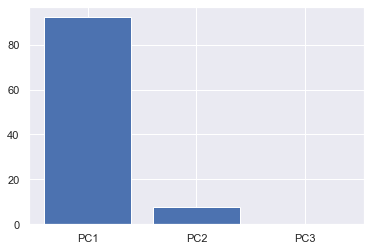

In [15]:
percent_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(percent_var)+1)]

plt.bar(x = range(1, len(percent_var)+1), height = percent_var, tick_label = labels)
plt.show()

In [58]:
print(pca_data)

[[-229.79090805 -136.43012499  -24.43500517]
 [-229.90394536 -134.899299    -25.73393647]
 [-225.9476862  -138.84694335  -24.07164205]
 ...
 [-229.97087036 -138.22723189  -25.24475744]
 [-229.85250848 -138.82850351  -25.51804729]
 [-229.8257678  -138.33113584  -22.18368916]]


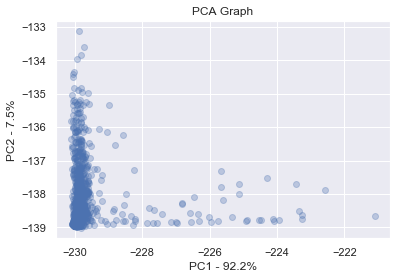

In [60]:
pca_df = pd.DataFrame(pca_data, columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2, alpha = 0.3)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(percent_var[0]))
plt.ylabel('PC2 - {0}%'.format(percent_var[1]))

plt.show()

### tSNE

In [ ]:
# tSNE on expression data of just the 3 genes

tsne_model = TSNE(n_components = 3, random_state = 0)

tsne_data = tsne_model.fit_transform(selectGenes_T)
# learning rate  = 100 -> try between 50 adn 2000

plt.scatter(tsne_data[:,0], tsne_data[:,1], alpha = 0.3)
plt.show()

(832, 28874)


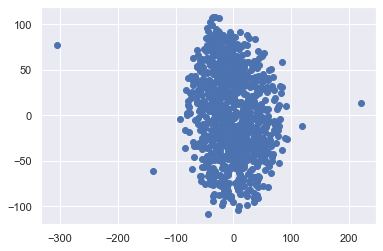

In [49]:
# tSNE on expression data of all genes

full_data_T = np.transpose(data_full)
print(full_data_T.shape)

tsne_model = TSNE(n_components = 3, random_state = 0)

tsne_data_full = tsne_model.fit_transform(full_data_T)
# learning rate  = 100 -> try between 50 adn 2000

plt.scatter(tsne_data_full[:,0], tsne_data_full[:,1])
plt.show()

### K-means clustering where k = 4

Uses expression data from the three genes

try using k-means where k=4 based on patient AURKA ESR1 HER2 expression

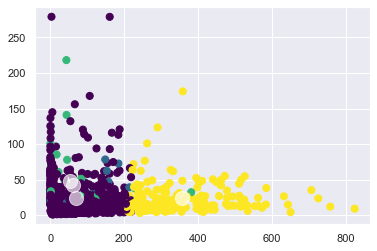

In [56]:
# conducts k-means with k=4

kmeans = KMeans(n_clusters=4)
kmeans.fit(selectGenes_T)
y_kmeans = kmeans.predict(selectGenes_T)

plt.scatter(selectGenes_T[:, 0], selectGenes_T[:, 1], c=y_kmeans, s=50, cmap='viridis') # colors the scatter plot by cluster

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.65); # plots centers of the clusters

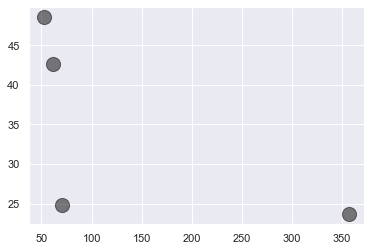

In [53]:
# plots only the centers of the clusters

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# color the PCA by cluster

plt.scatter(pca_df.PC1, pca_df.PC2, )
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(percent_var[0]))
plt.ylabel('PC2 - {0}%'.format(percent_var[1]))

plt.show()

In [ ]:
# plot distributiuons of those genes to compare expression across clusters


print(kmeans.labels_)

### K-means clustering where k = 3

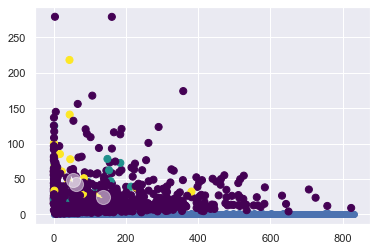

In [29]:
# conducts k-means with k=3

kmeans = KMeans(n_clusters=3)
kmeans.fit(selectGenes_T)
y_kmeans = kmeans.predict(selectGenes_T)

plt.scatter(range(0,832,1), y_kmeans) # plots the scatter plot

plt.scatter(selectGenes_T[:, 0], selectGenes_T[:, 1], c=y_kmeans, s=50, cmap='viridis') # colors the scatter plot by cluster

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5); # plots centers of the clusters

# This is where the actual subtyping happens

In [83]:
# read in the payload file

payload_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/Payload_FPKM.txt"
payload = pd.read_csv(payload_path)
payload.head()

import json
payload_json = json.load(open(payload_path))
print(payload_json)

{'filters': {'op': 'in', 'content': {'field': 'files.file_id', 'value': ['003bf5f9-48dd-4910-9f87-21409e9e258d', '00ae19b2-33b1-443e-88c6-aad3826a2c9b', '01c6a5d1-a064-4fec-86ae-db3f86029333', '022145fc-22ef-4a9b-b0f3-1142bccec452', '02415e27-7abc-4e58-b7aa-ea7c92fda8e9', '026da6b4-3e50-4ddd-ac33-aa526e844813', '02acf9e4-7fe9-49cb-96e8-0d760299f010', '03378f59-a81d-4b44-9b41-e64c9c6132cd', '034375d5-42e7-469b-a6f3-2d863122f3ca', '035100b7-f408-40b3-bd80-ff98fdf1b0c7', '039b874d-43f2-48b5-b3cc-e5a708af83f2', '03fc136d-1aee-4e0f-b271-e52ef7680fa9', '055e2cb1-d3d3-422b-af55-835ff7d32a1f', '057010a9-87a8-44fa-b96e-502da90e5ebc', '05a734dd-0260-47ca-84a1-51f5b0d4711b', '05cfd5e2-0485-4f97-a178-9491c8e770e3', '05fffdbd-da34-42aa-b842-7088506b97ef', '06470aad-8322-4fe8-a4be-1b2e3acfaa37', '069ef301-d844-4b2d-8302-8e68d57971c4', '06cb336b-7821-4d06-b894-f15fb0cbe9e2', '074e911d-ed58-4f3d-8ec2-41f1f8998f17', '07760e89-4791-43e2-82d3-412e9af5cfc3', '0776f2f4-442f-404a-b77b-8881b28d23c7', '07773c

In [45]:
## reads in the manifest file

manifest_path = "/Users/ursulawidocki/Desktop/BreCaNet/Data/gdc_manifest_FPKM.txt"
manifest = pd.read_csv(manifest_path, delimiter = "\t")
manifest.head()

,id,filename,md5,size,state
0,003bf5f9-48dd-4910-9f87-21409e9e258d,ee05eaa6-eaca-4438-ac1f-4259f525e2a1.FPKM.txt.gz,b95daaae8fa17934902de6423b3a7f28,531353,validated
1,00ae19b2-33b1-443e-88c6-aad3826a2c9b,257b1c80-203b-4cf0-9841-5a1242299270.FPKM.txt.gz,90a6406bc5e603623bd4cb9c5061885c,527716,validated
2,01c6a5d1-a064-4fec-86ae-db3f86029333,4fd01cd7-7ff5-4570-891e-747a0c640ddc.FPKM.txt.gz,9ebf5a5b758613bf38b08cf5cd25e109,509047,validated
3,022145fc-22ef-4a9b-b0f3-1142bccec452,5943b9f4-fd43-46dc-8ebe-a0145e4ee7c3.FPKM.txt.gz,c23c65f296221d53b615cbf4eb076643,530565,validated
4,02415e27-7abc-4e58-b7aa-ea7c92fda8e9,ffd7b10e-8c0c-4aeb-81a0-b060108d57fa.FPKM.txt.gz,8bf02eae3ab9057cf981c290f4f602e2,531515,validated


In [42]:
## reads in metadat line by line to extract just the necessary information

metaPath = '/Users/ursulawidocki/Desktop/BreCaNet/Data/metadata.cart.FPKM.json'

file_id = list()
f = 0
case_id = list()
c = 0
with open(metaPath, "r") as file:
    for line in file.readlines():
        
        if "file_id" in line:
            item = line.strip().split("\"")[3]
            f = f + 1
            
            if(f%2 == 0):
                file_id.append(item)
                
        if("case_id" in line) and (f%2 == 0):
            case = line.strip().split("\"")[3]
            c = c + 1
            case_id.append(case)

print(len(file_id))
print(len(case_id))
print(case_id[0:5])

832
832
['3c612e12-6de8-44fa-a095-805c45474821', 'fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c', '38a631a1-6875-4216-a335-ee93c90a86d6', '99927651-34be-4795-893a-128d8a1fdb30', '4e3699da-4367-4a43-9d66-a117d3ad460d']


In [40]:
## reads in folder and indiv IDs to match subtypes

IDPath = '/Users/ursulawidocki/Desktop/BreCaNet/Data/IDList_FPKM.txt'
folderIDPath = '/Users/ursulawidocki/Desktop/BreCaNet/Data/foldIDList_FPKM.txt'

IDs = pd.read_csv(IDPath, delimiter = '\t', header = None)
IDs_list = list(IDs[0])

folders = pd.read_csv(folderIDPath, delimiter = '\t', header = None)
folders_list = list(folders[0])

In [75]:
## reads in the data with PAM50 subtype info

subtype_path = "/Users/ursulawidocki/Desktop/BreCaNet/Code/TCGA_subtypes.txt"
subtypes = pd.read_csv(subtype_path, delimiter = " ")
subtypes.head()

,brca_subtypes.patient,brca_subtypes.BRCA_Subtype_PAM50
1,TCGA-3C-AAAU,LumA
2,TCGA-3C-AALI,LumA
3,TCGA-3C-AALJ,LumA
4,TCGA-3C-AALK,LumA
5,TCGA-4H-AAAK,LumA


In [76]:
subtype_levels = set(subtypes['brca_subtypes.BRCA_Subtype_PAM50'])

grouped_types = subtypes.groupby('brca_subtypes.BRCA_Subtype_PAM50')['brca_subtypes.patient'].apply(list)
grouped_types.head()

brca_subtypes.BRCA_Subtype_PAM50
Basal     [TCGA-3C-AAAU, TCGA-3C-AALI, TCGA-3C-AALJ, TCG...
Her2      [TCGA-3C-AAAU, TCGA-3C-AALI, TCGA-3C-AALJ, TCG...
LumA      [TCGA-3C-AAAU, TCGA-3C-AALI, TCGA-3C-AALJ, TCG...
LumB      [TCGA-3C-AAAU, TCGA-3C-AALI, TCGA-3C-AALJ, TCG...
Normal    [TCGA-3C-AAAU, TCGA-3C-AALI, TCGA-3C-AALJ, TCG...
Name: brca_subtypes.patient, dtype: object

In [36]:
## reads in clinical information to link patients with their barcode

clinicalPath = '/Users/ursulawidocki/Desktop/BreCaNet/Data/clinicalFiles/8162d394-8b64-4da2-9f5b-d164c54b9608/nationwidechildrens.org_clinical_patient_brca.txt'
clinical_df = pd.read_csv(clinicalPath, delimiter = '\t')

# removes rows that are not necessary to match data
clinical_df = clinical_df.drop(clinical_df.index[0])
clinical_df = clinical_df.drop(clinical_df.index[0])
clinical_df.head()
codes_df = clinical_df[['bcr_patient_uuid', 'bcr_patient_barcode']]
codes_df.head()

,bcr_patient_uuid,bcr_patient_barcode
2,6E7D5EC6-A469-467C-B748-237353C23416,TCGA-3C-AAAU
3,55262FCB-1B01-4480-B322-36570430C917,TCGA-3C-AALI
4,427D0648-3F77-4FFC-B52C-89855426D647,TCGA-3C-AALJ
5,C31900A4-5DCD-4022-97AC-638E86E889E4,TCGA-3C-AALK
6,6623FC5E-00BE-4476-967A-CBD55F676EA6,TCGA-4H-AAAK


In [47]:
uuid_list = list(codes_df['bcr_patient_uuid'])
barcode_list = list(codes_df['bcr_patient_barcode'])
#print(barcode_list)

manifest_file = list(manifest['filename'])
len(manifest_file)
for i in range(0,len(manifest_file)):
    manifest_file[i] = manifest_file[i][0:-12]

for j in range(0,len(manifest_file)):
    ptID = folders_list[j]
    #print(ptID)
    
    for i in range(0,len(uuid_list)):
        #print(uuid_list[i].lower())
        if('3c612e12-6de8-44fa-a095-805c45474821' == uuid_list[i].lower()):
            print("true")

#print(uuid_list[0].lower() in IDs_list)
#print(uuid_list[0].lower() in folders_list)
#print(IDs_list[0])
#print(folders_list[0])

#print(codes_df.iloc[0,0].lower() in folders_list)



true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [48]:
# make sure all list objects are the same length

print(len(folders_list))
print(len(file_id))
print(len(case_id))
print(len(uuid_list)) # ok if more
print(len(barcode_list)) # ok if more



832
832
832
1097
1097
